## 数据导入及处理

In [23]:
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np

In [24]:
train = pd.read_table('car.data',sep=',',names=['buying','maint','doors','persons','lug_boot','safety' ,'value'])

In [25]:
value = list(np.unique(train.value))
train.value.replace(value, list(np.arange(len(value))), inplace=True)

In [26]:
train_labels = train['value']
train.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2
3,vhigh,vhigh,2,2,med,low,2
4,vhigh,vhigh,2,2,med,med,2


In [27]:
train = train.drop(columns = ['value'])

## 缺失值统计

In [28]:
fs = FeatureSelector(data = train, labels = train_labels)

In [29]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



## 单一唯一值统计

In [30]:
fs.identify_single_unique()

0 features with a single unique value.



## 高度相关属性统计

In [31]:
fs.identify_collinear(correlation_threshold=0.8)

0 features with a correlation magnitude greater than 0.80.



## 零重要性属性统计

In [32]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[560]	valid_0's auc: 0.997781	valid_0's l2: 0.066703
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.992873	valid_0's l2: 0.146037
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[511]	valid_0's auc: 0.995732	valid_0's l2: 0.0800829
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.997354	valid_0's l2: 0.11139
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.99889	valid_0's l2: 0.0927253
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.989502	valid_0's l2: 0.188268
Training until validation scores don't improve for 100 rounds
Early s

## 绘制特征的重要性图表

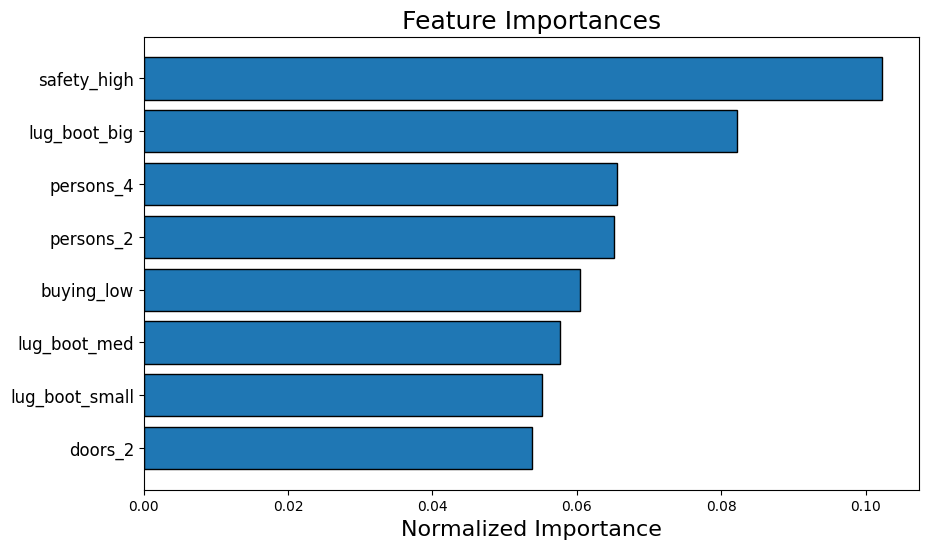

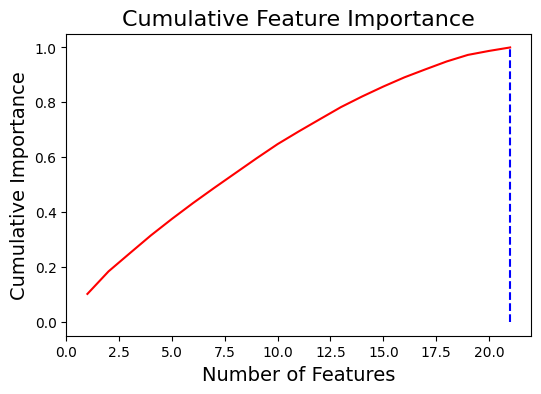

21 features required for 0.99 of cumulative importance


In [34]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 8)

In [35]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,safety_high,788.3,0.102257,0.102257
1,lug_boot_big,633.2,0.082138,0.184395
2,persons_4,506.0,0.065638,0.250032
3,persons_2,502.3,0.065158,0.315190
4,buying_low,465.7,0.060410,0.375600
5,lug_boot_med,445.1,0.057738,0.433338
6,lug_boot_small,425.3,0.055169,0.488507
7,doors_2,414.7,0.053794,0.542301
8,maint_high,414.4,0.053755,0.596057
9,buying_med,400.5,0.051952,0.648009


In [47]:
one_hundred_features = list(fs.feature_importances.loc[:8, 'feature'])
len(one_hundred_features)

9

## 特征删除

In [48]:
fs.identify_low_importance(cumulative_importance = 0.99)

20 features required for cumulative importance of 0.99 after one hot encoding.
1 features do not contribute to cumulative importance of 0.99.



In [40]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['doors_5more']

In [43]:
all_to_remove = fs.check_removal()
all_to_remove[:10]

Total of 1 features identified for removal


['doors_5more']

In [44]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 1 features.


In [45]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 21 features including one-hot features.


In [46]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 6
Final Number of Features:  6
